In [1]:
import gym
import pandas
import numpy as np

env = gym.make('CartPole-v0')

In [2]:
env.env?

In [168]:
num_episodes = 1000

life_memory = []

for i in range(num_episodes):
    old_observation = env.reset()
    done = False
    tot_reward = 0
    ep_memory = []
    while not done:
        new_action = env.action_space.sample()
        observation, reward, done, info = env.step(new_action)
        tot_reward += reward
        
        ep_memory.append({
            "obs0": old_observation[0],
            "obs1": old_observation[1],
            "obs2": old_observation[2],
            "obs3": old_observation[3],
            "action": new_action,
            "reward": reward,
            "episode": i,
        })
        old_observation = observation
        
    for ep_mem in ep_memory:
        ep_mem["tot_reward"] = tot_reward
        
    life_memory.extend(ep_memory)
    
memory_df = pandas.DataFrame(life_memory)


In [156]:
cnt = [i for i in memory_df.groupby("episode").count().tot_reward]

In [157]:
a = []
for j in range(len(cnt)):
    for i in range(1, cnt[j] + 1):
        a.append(i / cnt[j])

In [5]:
memory_df["res_reward"] = memory_df.tot_reward * a

In [162]:
memory_df.describe()

,obs0,obs1,obs2,obs3,action,reward,episode,tot_reward,comb_reward
count,224927.000000,224927.000000,224927.000000,224927.000000,224927.000000,224927.0,224927.000000,224927.000000,224927.000000
mean,0.000562,0.002332,0.001429,0.005100,0.500718,1.0,4999.833986,28.866499,35.139799
std,0.095756,0.531259,0.091534,0.780374,0.500001,0.0,2884.336784,15.774200,18.929040
min,-1.485617,-3.397601,-0.209435,-3.077418,0.000000,1.0,0.000000,8.000000,10.100000
25%,-0.040545,-0.355573,-0.051205,-0.500130,0.000000,1.0,2519.000000,17.000000,20.900000
50%,0.000327,0.001069,0.001417,0.003897,1.000000,1.0,5012.000000,25.000000,30.500000
75%,0.040804,0.356266,0.054722,0.514400,1.000000,1.0,7488.500000,36.000000,43.700000
max,1.510587,2.967349,0.209437,3.232461,1.000000,1.0,9999.000000,125.000000,150.500000


In [7]:
# memory_df.groupby("episode").reward.sum().mean()
# memory_df["comb_reward"] = .5*memory_df.reward + memory_df.res_reward

In [169]:
memory_df.groupby("episode").reward.sum().mean()
memory_df["comb_reward"] = .5*memory_df.reward + 1.2 * memory_df.tot_reward

In [170]:
memory_df

,obs0,obs1,obs2,obs3,action,reward,episode,tot_reward,comb_reward
0,-0.008814,-0.049155,0.021777,0.008311,0,1.0,0,22.0,26.9
1,-0.009797,-0.244583,0.021943,0.307784,1,1.0,0,22.0,26.9
2,-0.014689,-0.049780,0.028099,0.022102,0,1.0,0,22.0,26.9
3,-0.015684,-0.245294,0.028541,0.323516,1,1.0,0,22.0,26.9
4,-0.020590,-0.050589,0.035011,0.039969,0,1.0,0,22.0,26.9
...,...,...,...,...,...,...,...,...,...
22486,-0.017757,-0.557716,0.116796,1.028684,1,1.0,999,14.0,17.3
22487,-0.028911,-0.364325,0.137370,0.774835,0,1.0,999,14.0,17.3
22488,-0.036198,-0.561043,0.152867,1.107391,0,1.0,999,14.0,17.3
22489,-0.047418,-0.757807,0.175015,1.443863,1,1.0,999,14.0,17.3


In [7]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
import datetime

n = datetime.datetime.now
t = n()

RandomForest = RandomForestRegressor()
RandomForest.fit(memory_df[["obs0", "obs1", "obs2", "obs3", "action"]], memory_df.comb_reward)
print(f"Training time: {n() - t}s")

Training time: 0:06:21.387082s


In [ ]:
AdaBoost = AdaBoostRegressor()
AdaBoost.fit(memory_df[["obs0", "obs1", "obs2", "obs3", "action"]], memory_df.comb_reward)

In [5]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor

ExtraTrees = ExtraTreesRegressor()
ExtraTrees.fit(memory_df[["obs0", "obs1", "obs2", "obs3", "action"]], memory_df.comb_reward)

ExtraTreesRegressor()

In [ ]:
t = n()
num_episodes = 100
a_life_memory = []
a_env = gym.make('CartPole-v0')
for i in range(num_episodes):
    a_old_observation = a_env.reset()
    a_done = False
    a_tot_reward = 0
    a_em_memory = []
    
    while not a_done:
        pred_in = [list(a_old_observation) + [i] for i in range(2)]
        a_new_action = np.argmax(AdaBoost.predict(pred_in))
        a_observation, a_reward, a_done, a_info = a_env.step(a_new_action)
        a_tot_reward += a_reward
        
        a_em_memory.append({
            "obs0": a_old_observation[0],
            "obs1": a_old_observation[1],
            "obs2": a_old_observation[2],
            "obs3": a_old_observation[3],
            "action": a_new_action,
            "reward": a_reward,
            "episode": i,
        })
        
        a_old_observation = a_observation

    for a_em in a_em_memory:
        a_em["tot_reward"] = a_tot_reward
        
    a_life_memory.extend(a_em_memory)
a_memory_df = pandas.DataFrame(a_life_memory)
print(f"Training time: {n() - t}s")

In [ ]:
a_memory_df.shape

In [8]:
t = n()
num_episodes = 100
r_life_memory = []
r_env = gym.make('CartPole-v0')
for i in range(num_episodes):
    r_old_observation = r_env.reset()
    r_done = False
    r_tot_reward = 0
    r_em_memory = []
    while not r_done:
        pred_in = [list(r_old_observation) + [i] for i in range(2)]
        r_new_action = np.argmax(RandomForest.predict(pred_in))
        r_observation, r_reward, r_done, r_info = r_env.step(r_new_action)
        r_tot_reward += r_reward
        
        r_em_memory.append({
            "obs0": r_old_observation[0],
            "obs1": r_old_observation[1],
            "obs2": r_old_observation[2],
            "obs3": r_old_observation[3],
            "action": r_new_action,
            "reward": r_reward,
            "episode": i,
        })
        
        r_old_observation = r_observation
        
    for r_em in r_em_memory:
        r_em["tot_reward"] = r_tot_reward
        
    r_life_memory.extend(r_em_memory)
r_memory_df = pandas.DataFrame(r_life_memory)
print(f"Training time: {n() - t}s")

Training time: 0:01:32.868485s


In [9]:
pandas.DataFrame(r_life_memory).shape

(15715, 8)

In [10]:
r_memory_df.groupby("episode").reward.sum().mean()

157.15

In [8]:
import datetime 

n = datetime.datetime.now
t = n()

In [10]:
t = n()
num_episodes = 100
e_life_memory = []
e_env = gym.make('CartPole-v0')
for i in range(num_episodes):
    e_old_observation = e_env.reset()
    e_done = False
    e_tot_reward = 0
    e_em_memory = []
    while not e_done:
        pred_in = [list(e_old_observation) + [i] for i in range(2)]
        e_new_action = np.argmax(ExtraTrees.predict(pred_in))
        e_observation, e_reward, e_done, e_info = e_env.step(e_new_action)
        e_tot_reward += e_reward
        e_em_memory.append({
            "obs0": e_old_observation[0],
            "obs1": e_old_observation[1],
            "obs2": e_old_observation[2],
            "obs3": e_old_observation[3],
            "action": e_new_action,
            "reward": e_reward,
            "episode": i,
        })
        
        e_old_observation = e_observation

    for e_em in e_em_memory:
        e_em["tot_reward"] = e_tot_reward
    e_life_memory.extend(e_em_memory)
e_memory_df = pandas.DataFrame(e_life_memory)
print(f"Training time: {n() - t}s")

Training time: 0:01:24.926064s


In [ ]:
e_env.reset()
e_env.step(1)

In [ ]:
np.argmax(ExtraTrees.predict([[ 0.03719052,  0.20216305,  0.01937592, -0.24454289, 1], [ 0.03719052,  0.20216305,  0.01937592, -0.24454289, 0]]))

In [11]:
r_memory_df.groupby("episode").reward.sum().mean()

157.15

In [12]:
(r_memory_df.groupby("episode").reward.sum() >= 200).value_counts()

False    65
True     35
Name: reward, dtype: int64

In [ ]:
a_memory_df.groupby("episode").reward.sum().mean()

In [ ]:
(a_memory_df.groupby("episode").reward.sum() >= 200).value_counts()

In [11]:
e_memory_df.groupby("episode").reward.sum().mean()

138.02

In [12]:
(e_memory_df.groupby("episode").reward.sum() >= 200).value_counts()

False    83
True     17
Name: reward, dtype: int64

In [15]:
[i for i in range(50, 40)]

[]

In [13]:
memory_df.shape

(221395, 9)

In [14]:
x = memory_df[["obs0", "obs1", "obs2", "obs3", "action"]]
y = memory_df.comb_reward

In [15]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [16]:
ENCODING_DIM = 64
HIDDEN_DIM = 256
### BEGIN SOLUTION
# Encoder model
inputs = Input(shape=(5,)) 
encoder_hidden = Dense(HIDDEN_DIM, activation="sigmoid")(inputs)
encoded = Dense(ENCODING_DIM, activation="relu")(encoder_hidden)
encoder_model = Model(inputs, encoded, name='encoder')

# Decoder model
encoded_inputs = Input(shape=(ENCODING_DIM,), name='encoding')
decoder_hidden = Dense(HIDDEN_DIM, activation="relu")(encoded_inputs)
reconstruction = Dense(1, activation="sigmoid")(decoder_hidden)
decoder_model = Model(encoded_inputs, reconstruction, name='decoder')

# Defining the full model as the combination of the two
outputs = decoder_model(encoder_model(inputs))
full_model = Model(inputs, outputs, name='full_ae')

In [17]:
# full_model = Model(inputs=inputs, 
#                    outputs=outputs)

full_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [18]:
full_model.summary()

Model: "full_ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
encoder (Functional)         (None, 64)                17984     
_________________________________________________________________
decoder (Functional)         (None, 1)                 16897     
Total params: 34,881
Trainable params: 34,881
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = full_model.fit(x, y, shuffle=True, epochs=5)

Epoch 1/5
6919/6919 [==============================] - 8s 1ms/step - loss: -1186426880.0000 - accuracy: 0.0000e+00
Epoch 2/5
6919/6919 [==============================] - 8s 1ms/step - loss: -17254608896.0000 - accuracy: 0.0000e+00
Epoch 3/5
6919/6919 [==============================] - 8s 1ms/step - loss: -73768976384.0000 - accuracy: 0.0000e+00
Epoch 4/5
6919/6919 [==============================] - 8s 1ms/step - loss: -197406605312.0000 - accuracy: 0.0000e+00
Epoch 5/5
6919/6919 [==============================] - 8s 1ms/step - loss: -414615437312.0000 - accuracy: 0.0000e+00


In [173]:
memory_df

,obs0,obs1,obs2,obs3,action,reward,episode,tot_reward,comb_reward
0,-0.008814,-0.049155,0.021777,0.008311,0,1.0,0,22.0,26.9
1,-0.009797,-0.244583,0.021943,0.307784,1,1.0,0,22.0,26.9
2,-0.014689,-0.049780,0.028099,0.022102,0,1.0,0,22.0,26.9
3,-0.015684,-0.245294,0.028541,0.323516,1,1.0,0,22.0,26.9
4,-0.020590,-0.050589,0.035011,0.039969,0,1.0,0,22.0,26.9
...,...,...,...,...,...,...,...,...,...
22486,-0.017757,-0.557716,0.116796,1.028684,1,1.0,999,14.0,17.3
22487,-0.028911,-0.364325,0.137370,0.774835,0,1.0,999,14.0,17.3
22488,-0.036198,-0.561043,0.152867,1.107391,0,1.0,999,14.0,17.3
22489,-0.047418,-0.757807,0.175015,1.443863,1,1.0,999,14.0,17.3


In [174]:
x_mat = memory_df[["obs0", "obs1", "obs2", "obs3", "action"]].to_numpy()
y = memory_df['comb_reward'].to_numpy()
num_ = memory_df.shape[0]

In [175]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
y = s.fit_transform(y.reshape(-1,1))
y = y.reshape(-1,)

In [176]:
W_1 = np.random.uniform(-1,1,size=(5,64))
W_2 = np.random.uniform(-1,1,size=(64))

In [177]:
W_2.shape

(64,)

In [178]:
# Practice
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

# def loss_fn(y_true, y_pred, eps=1e-16):
#     y_pred = np.maximum(y_pred, eps)
#     y_pred = np.minimum(y_pred, (1-eps))
#     return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W_1, W_2):
    global x_mat
    global y
    global num_

    z_2 = np.dot(x_mat, W_1)    # (221191 , 5) x (5, 64) = (221191 , 64)
    a_2 = sigmoid(z_2)          # (221191 , 64)
    z_3 = np.dot(a_2, W_2)      # (221191 , 64) x (64, ) = (221191 , )
    y_pred = sigmoid(z_3).reshape((len(x_mat),))      # (221191 , )
    J_z_3_grad = -y + y_pred      # (221191 , )
    J_W_2_grad = np.dot(J_z_3_grad, a_2)      # (221191 , ) x (221191 , 64) = (64, )
    a_2_z_2_grad = sigmoid(z_2)*(1 - sigmoid(z_2))  # (221191 , 64) * (221191 , 64) = (221191 , 64)
#     J_W_1_grad = a_1 * a_2_z_2_grad * W_2 * J_z_3_grad
#     J_W_1_grad = np.dot(x_mat, a_2_z_2_grad).dot(W_2).dot(J_z_3_grad)
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
# (221191 , )->(221191 , 1) x (64 x 1).T = (221191 , 64) * (221191 , 64) = (221191 , 64).T = (64, 221191 ) x (221191 , 5)
# = (64, 5).T = (5, 64)
    gradient = (J_W_1_grad, J_W_2_grad)
    return y_pred, gradient

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

In [179]:
# Practice
import datetime
n = datetime.datetime.now
t = n()

np.random.seed(1241)

num_iter = 1000
learning_rate = .001
# x_mat = x_mat_full

total_pred = []
for i in range(num_iter):
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
    W_1 = W_1 - learning_rate * J_W_1_grad
    W_2 = W_2 - learning_rate * J_W_2_grad
    
    total_pred.append(y_pred)
print(f"Training time: {n() - t}s")

Training time: 0:01:18.224479s


In [180]:
total_pred[0]

array([0.70547701, 0.51228444, 0.70803825, ..., 0.90725698, 0.80009828,
       0.74845922])

In [181]:
errorfi = np.sqrt(np.power((y - total_pred[0]), 2))
errorff = np.sqrt(np.power((y - total_pred[-1]), 2))

In [182]:
errorfi

array([0.54297701, 0.34978444, 0.54553825, ..., 0.84475698, 0.73759828,
       0.68595922])

In [183]:
errorfi

array([0.54297701, 0.34978444, 0.54553825, ..., 0.84475698, 0.73759828,
       0.68595922])

In [184]:
errorff

array([0.1625    , 0.33533516, 0.1625    , ..., 0.0625    , 0.04995127,
       0.14862752])

In [185]:
errorfi.sum()/len(errorfi)

0.3498153510978015

In [186]:
errorff.sum()/len(errorff)

0.257304849910329

In [187]:
fig_y = []
for i in range(len(total_pred)):
    errorfi = np.sqrt(np.power((y - total_pred[i]), 2))
    fig_y.append(errorfi.sum()/len(errorfi))

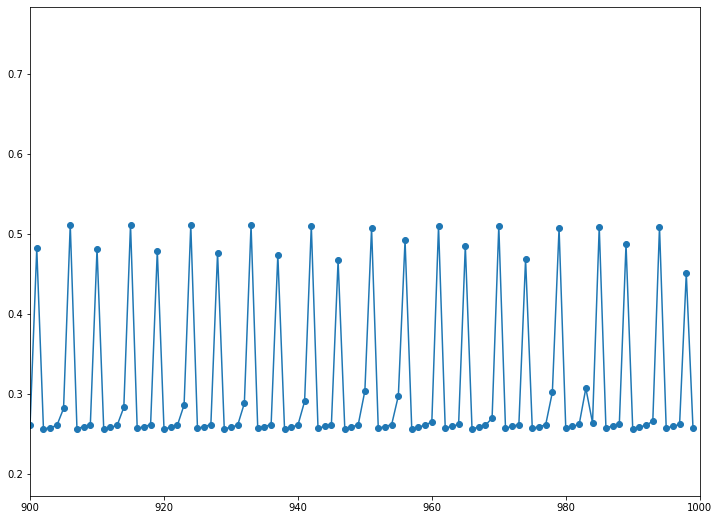

In [196]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.plot([i for i in range(len(fig_y))], fig_y, marker='o')
plt.xlim(900, 1000)
plt.show()

In [189]:
def nn_predict(pred_in):
    z_2 = np.dot(pred_in[0], W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred1 = sigmoid(z_3)
    
    z2_2 = np.dot(pred_in[1], W_1)
    a2_2 = sigmoid(z2_2)
    z2_3 = np.dot(a2_2, W_2)
    y_pred2 = sigmoid(z2_3)
    
    return y_pred1, y_pred2

In [192]:
t = n()
num_episodes = 100
n_life_memory = []
n_env = gym.make('CartPole-v0')
for i in range(num_episodes):
    n_old_observation = n_env.reset()
    n_done = False
    n_tot_reward = 0
    n_em_memory = []
    while not n_done:
        pred_in = [list(n_old_observation) + [i] for i in range(2)]
        n_new_action = np.argmax([nn_predict(pred_in)])
        n_observation, n_reward, n_done, n_info = n_env.step(n_new_action)
        n_tot_reward += n_reward
        n_em_memory.append({
            "obs0": n_old_observation[0],
            "obs1": n_old_observation[1],
            "obs2": n_old_observation[2],
            "obs3": n_old_observation[3],
            "action": n_new_action,
            "reward": n_reward,
            "episode": i,
        })
        
        n_old_observation = n_observation

    for n_em in n_em_memory:
        n_em["tot_reward"] = n_tot_reward
    n_life_memory.extend(n_em_memory)
n_memory_df = pandas.DataFrame(n_life_memory)
print(f"Training time: {n() - t}s")

Training time: 0:00:00.058713s


In [193]:
n_memory_df

,obs0,obs1,obs2,obs3,action,reward,episode,tot_reward
0,0.013810,-0.021815,0.012050,-0.003764,1,1.0,0,10.0
1,0.013374,0.173132,0.011975,-0.292621,1,1.0,0,10.0
2,0.016836,0.368081,0.006123,-0.581503,1,1.0,0,10.0
3,0.024198,0.563117,-0.005507,-0.872251,1,1.0,0,10.0
4,0.035460,0.758313,-0.022952,-1.166660,1,1.0,0,10.0
...,...,...,...,...,...,...,...,...
929,-0.031286,0.608807,-0.065221,-0.895345,1,1.0,99,8.0
930,-0.019110,0.804749,-0.083128,-1.207795,1,1.0,99,8.0
931,-0.003015,1.000841,-0.107284,-1.525328,1,1.0,99,8.0
932,0.017002,1.197082,-0.137790,-1.849479,1,1.0,99,8.0


In [194]:
n_memory_df.groupby("episode").reward.sum().mean()

9.34

In [195]:
(n_memory_df.groupby("episode").reward.sum() >= 200).value_counts()

False    100
Name: reward, dtype: int64